## Observations and Insights 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print(len(mouse_study["Mouse ID"].unique()))

249


In [3]:
# Finding the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_study.duplicated(subset=["Mouse ID", "Timepoint"])
duplicate = duplicate[duplicate == True]
duplicate

909    True
911    True
913    True
915    True
917    True
dtype: bool

In [4]:
# Drop the duplicate indexes and check to see if they were dropped
mouse_study_clean = mouse_study.drop(index=[909, 911, 913, 915, 917])
mouse_study_clean.loc[mouse_study["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [5]:
# Checking the number of mice in the clean dataframe.
print(len(mouse_study_clean["Mouse ID"].unique()))

249


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Create groupedby dataframe
mouse_study_group = mouse_study_clean.groupby(["Drug Regimen"])

# Cacluate summary statistics and store into series
tumor_mean = mouse_study_group["Tumor Volume (mm3)"].mean()
tumor_median = mouse_study_group["Tumor Volume (mm3)"].median()
tumor_var = mouse_study_group["Tumor Volume (mm3)"].var()
tumor_sd = mouse_study_group["Tumor Volume (mm3)"].std()
tumor_sem = mouse_study_group["Tumor Volume (mm3)"].sem()

# Create dictionary
tumor_dict = {"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_var, "Standard Dev.": tumor_sd, "Standard Error": tumor_sem}

# Creat dataframe
tumor_df = pd.DataFrame(tumor_dict)

# Display dataframe
tumor_df

,Mean,Median,Variance,Standard Dev.,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

# Grab tumor volume column
tumor_vol = mouse_study_group["Tumor Volume (mm3)"]

# Create aggregate dataframe
tumor_agg = tumor_vol.agg(["mean", "median", "var", "std", "sem"])

# Rename columns
tumor_agg = tumor_agg.rename(columns= {"mean": "Mean", "median": "Median", "var": "Variance", "std": "Standard Dev.", "sem": "Standard Error"})

# Display dataframe
tumor_agg

,Mean,Median,Variance,Standard Dev.,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

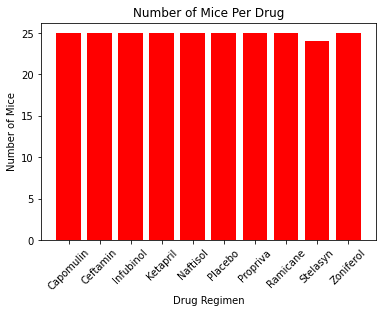

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Store Drug Regimen names into x axis
x_axis = mouse_study["Drug Regimen"].unique()
x_axis.sort()

# Delete duplicates of Mouse ID
mouse_study_shortened = mouse_study.drop_duplicates(subset= "Mouse ID")

# Store count of Drug Regimen into y axis
y_axis = mouse_study_shortened["Drug Regimen"].value_counts()

# Create bar chart
plt.bar(x_axis, y_axis.sort_index(), color='r', align="center")
plt.title("Number of Mice Per Drug")
plt.xlabel("Drug Regimen")
plt.xticks(rotation= 45)
plt.ylabel("Number of Mice")
plt.show()

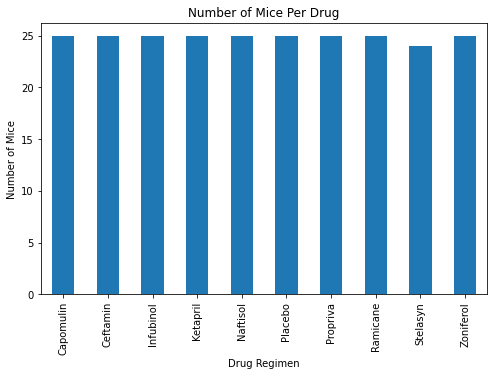

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Create dictionary
mouse_dict = {"Drug Regimen": x_axis.sort(), "Number of Mice": y_axis.sort_index()}

# Creat dataframe
mouse_df = pd.DataFrame(mouse_dict)

# Create bar chart
bar_plot = mouse_df.plot(kind="bar", figsize=(8,5), title= "Number of Mice Per Drug", xlabel= "Drug Regimen", ylabel= "Number of Mice", legend= False)
plt.show()

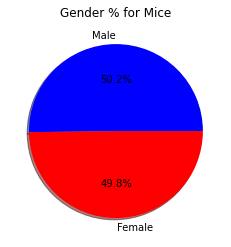

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Delete duplicates of Mouse ID
mouse_gender = mouse_study.drop_duplicates(subset= "Mouse ID")

# Store store male and female counts
mouse_gender_count = mouse_gender["Sex"].value_counts()
mouse_gender_count

# Create lists for pie chart
labels = ["Male", "Female"]
colors = ["blue", "red"]
    
# Create pie chart
plt.pie(mouse_gender_count, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Gender % for Mice")
plt.show()

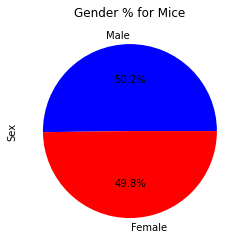

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_plot = mouse_gender_count.plot(kind="pie", colors=colors, autopct="%1.1f%%", title= "Gender % for Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Store final tumor volume for the 4 treatments
last_timepoint = mouse_study_clean.drop_duplicates(subset= "Mouse ID", keep='last')

last_timepoint_cap = last_timepoint[last_timepoint["Drug Regimen"] == "Capomulin"]
last_timepoint_ram = last_timepoint[last_timepoint["Drug Regimen"] == "Ramicane"]
last_timepoint_inf = last_timepoint[last_timepoint["Drug Regimen"] == "Infubinol"]
last_timepoint_cef = last_timepoint[last_timepoint["Drug Regimen"] == "Ceftamin"]

tumor_vol_cap = last_timepoint_cap["Tumor Volume (mm3)"]
tumor_vol_ram = last_timepoint_ram["Tumor Volume (mm3)"]
tumor_vol_inf = last_timepoint_inf["Tumor Volume (mm3)"]
tumor_vol_cef = last_timepoint_cef["Tumor Volume (mm3)"]

In [13]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Find outliers of Capomulin
quartiles = tumor_vol_cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_cap = tumor_vol_cap[(tumor_vol_cap > upper_bound) | (tumor_vol_cap < lower_bound)]

# Find outliers of Ramicane
quartiles = tumor_vol_ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_ram = tumor_vol_ram[(tumor_vol_ram > upper_bound) | (tumor_vol_ram < lower_bound)]

# Find outliers of Infubinol
quartiles = tumor_vol_inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_inf = tumor_vol_inf[(tumor_vol_inf > upper_bound) | (tumor_vol_inf < lower_bound)]

# Find outliers of Ceftamin
quartiles = tumor_vol_cef.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_cef = tumor_vol_cef[(tumor_vol_cef > upper_bound) | (tumor_vol_cef < lower_bound)]

# Print outliers for each treatment
print(f'The outliers for the treatment Capomulin are: {outliers_cap}')
print(f'The outliers for the treatment Ramicane are: {outliers_ram}')
print(f'The outliers for the treatment Infubinol are: {outliers_inf}')
print(f'The outliers for the treatment Ceftamin are: {outliers_cef}')

The outliers for the treatment Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)
The outliers for the treatment Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)
The outliers for the treatment Infubinol are: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
The outliers for the treatment Ceftamin are: Series([], Name: Tumor Volume (mm3), dtype: float64)


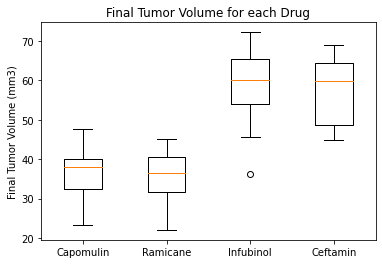

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Display boxplot of Capomulin
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Plot all tumor volumes
fig, ax1 = plt.subplots()
ax1.boxplot([tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef], labels= labels)
ax1.set_title("Final Tumor Volume for each Drug")
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

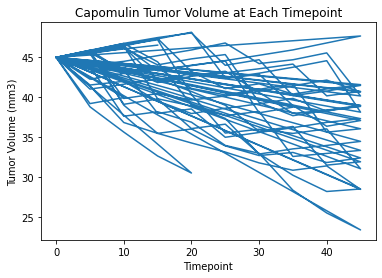

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Store information from Capomulin treatment
cap_df = mouse_study_clean[mouse_study_clean["Drug Regimen"] == "Capomulin"]

# Store x and y variables
x_axis = cap_df["Timepoint"]
y_axis = cap_df["Tumor Volume (mm3)"]

# Create line plot
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Tumor Volume at Each Timepoint")
plt.plot(x_axis, y_axis)
plt.show()

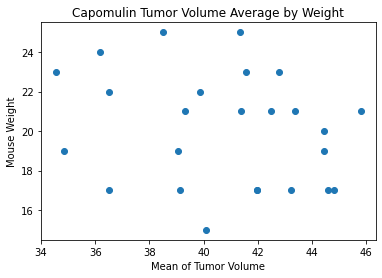

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Store mouse weight information
mouse_weight = cap_df.drop_duplicates(subset= "Mouse ID")
mouse_weight = mouse_weight["Weight (g)"]

# Store average tumor volume information
cap_group = cap_df.groupby(["Mouse ID"])
tumor_mean = cap_group.mean()
tumor_mean = tumor_mean["Tumor Volume (mm3)"]

# Create scatter plot
plt.xlabel("Mean of Tumor Volume")
plt.ylabel("Mouse Weight")
plt.title("Capomulin Tumor Volume Average by Weight")
plt.scatter(tumor_mean, mouse_weight)
plt.show()

## Correlation and Regression

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(tumor_mean, mouse_weight)
print(f'The correlation between tumor mean and mouse weight is {round(correlation[0],2)}')

The correlation between tumor mean and mouse weight is -0.23


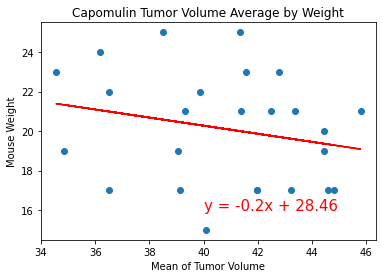

In [63]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor_mean, mouse_weight)
regress_values = tumor_mean * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(tumor_mean, mouse_weight)
plt.plot(tumor_mean, regress_values, "r-")
plt.annotate(line_eq, (40,16), fontsize=15, color="red")
plt.xlabel("Mean of Tumor Volume")
plt.ylabel("Mouse Weight")
plt.title("Capomulin Tumor Volume Average by Weight")
plt.show()